# Nutritionanalytics - INFO CHALLENGE 2024 : The Data of Global Change

USDA’s FoodData Central (FDC) is an integrated data system that provides expanded nutrient and food component data in one location. This database provides a snapshot in time of nutrients and other components found in a wide variety of foods and food products. For this project, students will analyze historical data and see how the data has changed and remained the same. This insight will provide a better understanding of which nutrients or components should be analyzed and which ones remain constant.

#### DataSet Structure: Master Data
1. **Field** : Definition of data element 
1. **FF_NDB** :	A number that uniquely identifies an SR Legacy item.
1. **SR_NDB** :	A number that uniquely identifies a Foundation Food item.
1. **food_category_id** : An ID indicating the food group to which a food item belongs.  See food category table for food category descriptions
1. **FF Food description** : Description of Foundation food item
1. **SR Food description** : Description of SR Legacy food item
1. **Nutrient_id** :	Unique identifier for a nutrient.  See the nutrient table for nutrient names.
1. **FF_Component** : Name of the nutrient or component for Foundation Foods
1. **SR_Component** : Name of the nutrient or component for SR Legacy foods
1. **unit_name** : The standard unit of measure for the nutrient
1. **SR Mean per 100g** : Average amount per 100g of edible portion of SR Legacy food
1. **SR Min** :	SR Legacy maximum nutrient/component value
1. **SR Max** :	SR Legacy minimum nutrient/component value
1. **Std_Error** :	Standard error of the  SR Legacy mean. Null if cannot be calculated. The standard error is also not given if the number of data points is less than three.
1. **SR Num_Data_pts** : Number of data points is the number of analyses used to calculate the nutrient value in SR Legacy. If the number of used to calculate the nutrient value. If the number of data points is 0, the value was calculated or imputed.
1. **FF Mean per 100g** : Average amount per 100g of edible portion of Foundation Food
1. **FF Min** :	Foundation Food minimum nutrient/component value
1. **FF Max** :	Foundation Food maximum nutrient/component value
1. **FF Median** :	Foundation Food median nutrient/component value
1. **FF data_points** : Number of data points is the number of analyses used to calculate the nutrient value in Foundation Foods
1. **FF Publication Date** : Date when the Foundation food was published to FoodData Central

#### DataSet Structure: Food Category Data
1. **food_category_id** : An ID indicating the food group to which a food item belongs
1. **description** : food category descriptions

#### DataSet Structure: Nutrient Data
1. **nutrient_id** : An unique identifier for each nutrient
1. **name** : nutrient name
1. **unit_name** : unit is which the nutrient is weighted
1. **rank** : An alternate way of ordering nutrients instead of listing alphabetically.  Ordering by rank will group similar nutrients together (proximates, vitamins, minerals)


### Let's start the project but first we will import some python libraries that will help us do the exploratory data analysis and plot graphs

In [1]:
#importing libraries for data analysis
import pandas as pd;
import numpy as np;
import seaborn as sns;
import matplotlib.pyplot as plt;

## Loading data 
The data given to us was in the *csv* format, so used *read_csv()* function from the pandas library

In [2]:
#Loading data from csv file
food_categorydata = pd.read_csv("food_category.csv")
ff_sr_data = pd.read_csv("FF_SR_data.csv")
nutrient_table = pd.read_csv('nutrient_id table.csv')

## Let's have a superficial look at our data

In [3]:
#displaying food category data
food_categorydata.head()

,food_category_id,description
0,1,Dairy and Egg Products
1,2,Spices and Herbs
2,3,Baby Foods
3,4,Fats and Oils
4,5,Poultry Products


In [4]:
#displaying master data 
ff_sr_data.head()

,FF_NDB,SR_NDB,food_category_id,FF Food description,SR Food description,Nutrient_id,rank,FF_Component,SR_Component,unit_name,...,SR Min,SR Max,Std_Error,SR Num_Data_pts,FF Mean per 100g,FF Min,FF Max,FF Median,FF data_points,FF Publication Date
0,16158,16158,16,"Hummus, commercial","Hummus, commercial",1090,5500,"Magnesium, Mg","Magnesium, Mg",MG,...,NaN,NaN,NaN,2,71.10,56.60,82.00,70.40,11.0,4/1/2019
1,16158,16158,16,"Hummus, commercial","Hummus, commercial",1258,9700,"Fatty acids, total saturated","Fatty acids, total saturated",G,...,NaN,NaN,NaN,0,2.22,NaN,NaN,NaN,NaN,4/1/2019
2,16158,16158,16,"Hummus, commercial","Hummus, commercial",1089,5400,"Iron, Fe","Iron, Fe",MG,...,NaN,NaN,NaN,2,2.41,1.87,2.96,2.33,11.0,4/1/2019
3,16158,16158,16,"Hummus, commercial","Hummus, commercial",1051,100,Water,Water,G,...,NaN,NaN,NaN,2,58.70,56.10,65.60,57.60,11.0,4/1/2019
4,16158,16158,16,"Hummus, commercial","Hummus, commercial",1103,6200,"Selenium, Se","Selenium, Se",UG,...,NaN,NaN,NaN,0,16.20,0.00,32.30,16.20,2.0,4/1/2019


# Analysis Focus: Everyday Food Categories

In our analysis, we have narrowed down our focus to everyday food categories to better understand the dietary patterns and nutrient composition of commonly consumed foods. The rationale behind this decision is to provide insights that are more directly applicable to everyday dietary choices and nutritional intake.

The selected everyday food categories were shortlisted based on their prevalence in daily diets and their significance in contributing to overall nutrient intake. These categories encompass foods that are commonly consumed across various demographics and are integral to typical dietary habits.

The shortlisted everyday food categories include:

1. **Fruits and Vegetables**: Essential sources of vitamins, minerals, and fiber, fruits and vegetables form a fundamental part of a balanced diet.
2. **Grains and Cereals**: Staple foods like rice, wheat, oats, and bread provide carbohydrates, fiber, and essential nutrients such as B vitamins and iron.
3. **Dairy Products**: Dairy items like milk, cheese, and yogurt are rich in calcium, protein, and other micronutrients crucial for bone health and overall well-being.
4. **Protein Sources**: This category includes meats, poultry, fish, eggs, beans, and legumes, providing high-quality protein, iron, zinc, and various vitamins.
5. **Fats and Oils**: While consumed in moderation, fats and oils from sources like olive oil, nuts, and avocados are essential for providing energy and fat-soluble vitamins.

By focusing our analysis on these everyday food categories, we aim to provide practical insights into the nutritional content of foods that individuals typically consume on a daily basis. This approach will facilitate a better understanding of dietary patterns and aid in making informed choices to promote overall health and well-being.


In [6]:
#day-to-day essential food categories
focus_category = [1,4,7,9,11,16,18,20]

In [7]:
#filtering focus category data
work_data = ff_sr_data.loc[ff_sr_data['food_category_id'].isin(focus_category)]
work_data.describe()

,FF_NDB,SR_NDB,food_category_id,Nutrient_id,rank,SR Mean per 100g,SR Min,SR Max,Std_Error,SR Num_Data_pts,FF Mean per 100g,FF Min,FF Max,FF Median,FF data_points
count,3391.000000,3391.000000,3391.000000,3391.000000,3391.000000,3391.000000,1820.000000,1820.000000,2003.000000,3391.000000,3391.000000,2975.000000,2975.000000,3006.000000,2889.000000
mean,8467.894426,8467.894426,8.070481,1107.903863,5973.598643,56.584387,36.113710,57.273450,3.149817,10.588617,53.921382,33.333239,51.759757,41.848184,9.088612
std,7093.467370,7093.467370,6.537754,83.763828,4514.911993,236.081004,183.988501,334.671915,36.173571,22.817754,205.173339,137.432941,205.215384,165.996719,5.260042
min,1001.000000,1001.000000,1.000000,1003.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1116.000000,1116.000000,1.000000,1062.000000,1700.000000,0.150000,0.040000,0.140000,0.008000,0.000000,0.106350,0.028575,0.130000,0.070000,7.000000
50%,9266.000000,9266.000000,9.000000,1093.000000,5800.000000,1.670000,0.657000,1.480000,0.068000,4.000000,1.380000,0.600000,1.390000,0.918500,8.000000
75%,11937.000000,11937.000000,11.000000,1166.000000,7290.000000,18.000000,10.000000,19.000000,0.527000,12.000000,17.400000,9.743050,18.400000,12.835000,9.000000
max,43382.000000,43382.000000,20.000000,2028.000000,18000.000000,5927.000000,4704.000000,8900.000000,1215.090000,580.000000,3668.750000,2700.000000,5040.000000,3399.500000,44.000000


In [1]:
#Calculating average number of food products in each food category
groupby_foodcategory = work_data.groupby(['food_category_id']).agg({'FF Food description':'count'})
print(groupby_foodcategory.head())
print('On an average there are these many food produts in each category:',groupby_foodcategory['FF Food description'].median())

NameError: name 'work_data' is not defined

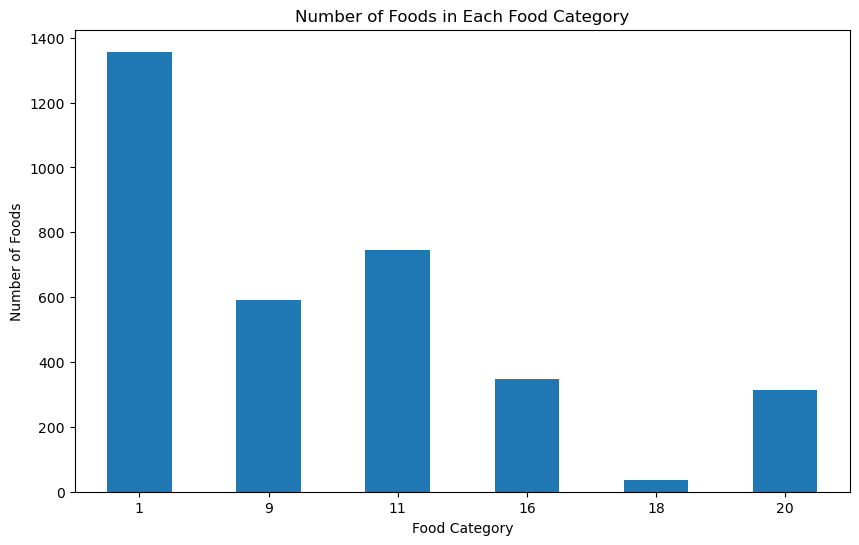

In [9]:
# Assuming 'food_category' is the column containing food categories in your DataFrame
food_category_counts = groupby_foodcategory['FF Food description']

# Plotting
plt.figure(figsize=(10, 6))
food_category_counts.plot(kind='bar')
plt.title('Number of Foods in Each Food Category')
plt.xlabel('Food Category')
plt.ylabel('Number of Foods')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

In [10]:
#checking for null values
work_data.isna().sum()

FF_NDB                    0
SR_NDB                    0
food_category_id          0
FF Food description       0
SR Food description       0
Nutrient_id               0
rank                      0
FF_Component              0
SR_Component              0
unit_name                 0
SR Mean per 100g          0
SR Min                 1571
SR Max                 1571
 Std_Error             1388
SR Num_Data_pts           0
FF Mean per 100g          0
FF Min                  416
FF Max                  416
FF Median               385
FF data_points          502
FF Publication Date       0
dtype: int64

In [11]:
#calculating mean values to be imputed instead of missing values
groupeddata = work_data.groupby(['food_category_id']).agg({'SR Min':'mean','SR Max':'mean',
                                                           ' Std_Error':'mean','FF Min':'mean','FF Max':'mean',
                                                          'FF Median':'median','FF data_points':'mean'})
groupeddata.head(10)

,SR Min,SR Max,Std_Error,FF Min,FF Max,FF Median,FF data_points
food_category_id,,,,,,,
1,48.673795,67.474026,1.860247,41.816946,61.668701,0.7000,11.118985
9,11.061112,16.741477,0.568927,10.113493,15.223397,0.1850,7.514735
11,36.049597,72.923305,6.498240,27.767945,51.416370,0.6200,8.115806
16,50.056180,75.993336,5.349133,58.814890,81.262180,3.3225,7.621262
18,29.592821,42.404643,1.812929,26.625222,57.359370,2.1000,13.884615
20,50.819290,59.800306,2.346598,26.855401,46.150018,3.0350,6.944649


In [13]:
# Define a function to impute missing values based on the mean values for each category
def impute_missing_values(row):
    category_id = row['food_category_id']
    # Impute missing values based on the mean values of the respective food category
    row['SR Min'] = groupeddata.loc[groupeddata.index==category_id]['SR Min'] if pd.isna(row['SR Min']) else row['SR Min']
    row['SR Max'] = groupeddata.loc[groupeddata.index==category_id]['SR Max'] if pd.isna(row['SR Max']) else row['SR Max']
    row[' Std_Error'] = groupeddata.loc[groupeddata.index==category_id][' Std_Error'] if pd.isna(row[' Std_Error']) else row[' Std_Error']
    row['FF Min'] = groupeddata.loc[groupeddata.index==category_id]['FF Min'] if pd.isna(row['FF Min']) else row['FF Min']
    row['FF Max'] = groupeddata.loc[groupeddata.index==category_id]['FF Max'] if pd.isna(row['FF Max']) else row['FF Max']
    row['FF Median'] = groupeddata.loc[groupeddata.index==category_id]['FF Median'] if pd.isna(row['FF Median']) else row['FF Median']
    row['FF data_points'] = groupeddata.loc[groupeddata.index==category_id]['FF data_points'] if pd.isna(row['FF data_points']) else row['FF data_points']

    return row

# Apply the function to impute missing values for each row
work_data_imputed = work_data.apply(impute_missing_values, axis=1)
work_data_imputed.head()

,FF_NDB,SR_NDB,food_category_id,FF Food description,SR Food description,Nutrient_id,rank,FF_Component,SR_Component,unit_name,...,SR Min,SR Max,Std_Error,SR Num_Data_pts,FF Mean per 100g,FF Min,FF Max,FF Median,FF data_points,FF Publication Date
0,16158,16158,16,"Hummus, commercial","Hummus, commercial",1090,5500,"Magnesium, Mg","Magnesium, Mg",MG,...,"food_category_id 16 50.05618 Name: SR Min, ...","food_category_id 16 75.993336 Name: SR Max,...",food_category_id 16 5.349133 Name: Std_Err...,2,71.10,56.6,82.0,70.4,11.0,4/1/2019
1,16158,16158,16,"Hummus, commercial","Hummus, commercial",1258,9700,"Fatty acids, total saturated","Fatty acids, total saturated",G,...,"food_category_id 16 50.05618 Name: SR Min, ...","food_category_id 16 75.993336 Name: SR Max,...",food_category_id 16 5.349133 Name: Std_Err...,0,2.22,"food_category_id 16 58.81489 Name: FF Min, ...","food_category_id 16 81.26218 Name: FF Max, ...","food_category_id 16 3.3225 Name: FF Median,...",food_category_id 16 7.621262 Name: FF data_...,4/1/2019
2,16158,16158,16,"Hummus, commercial","Hummus, commercial",1089,5400,"Iron, Fe","Iron, Fe",MG,...,"food_category_id 16 50.05618 Name: SR Min, ...","food_category_id 16 75.993336 Name: SR Max,...",food_category_id 16 5.349133 Name: Std_Err...,2,2.41,1.87,2.96,2.33,11.0,4/1/2019
3,16158,16158,16,"Hummus, commercial","Hummus, commercial",1051,100,Water,Water,G,...,"food_category_id 16 50.05618 Name: SR Min, ...","food_category_id 16 75.993336 Name: SR Max,...",food_category_id 16 5.349133 Name: Std_Err...,2,58.70,56.1,65.6,57.6,11.0,4/1/2019
4,16158,16158,16,"Hummus, commercial","Hummus, commercial",1103,6200,"Selenium, Se","Selenium, Se",UG,...,"food_category_id 16 50.05618 Name: SR Min, ...","food_category_id 16 75.993336 Name: SR Max,...",food_category_id 16 5.349133 Name: Std_Err...,0,16.20,0.0,32.3,16.2,2.0,4/1/2019


In [14]:
#summarizing the data with imputed values
work_data_imputed.describe()

,FF_NDB,SR_NDB,food_category_id,Nutrient_id,rank,SR Mean per 100g,SR Num_Data_pts,FF Mean per 100g
count,3391.000000,3391.000000,3391.000000,3391.000000,3391.000000,3391.000000,3391.000000,3391.000000
mean,8467.894426,8467.894426,8.070481,1107.903863,5973.598643,56.584387,10.588617,53.921382
std,7093.467370,7093.467370,6.537754,83.763828,4514.911993,236.081004,22.817754,205.173339
min,1001.000000,1001.000000,1.000000,1003.000000,100.000000,0.000000,0.000000,0.000000
25%,1116.000000,1116.000000,1.000000,1062.000000,1700.000000,0.150000,0.000000,0.106350
50%,9266.000000,9266.000000,9.000000,1093.000000,5800.000000,1.670000,4.000000,1.380000
75%,11937.000000,11937.000000,11.000000,1166.000000,7290.000000,18.000000,12.000000,17.400000
max,43382.000000,43382.000000,20.000000,2028.000000,18000.000000,5927.000000,580.000000,3668.750000


In [15]:
# Group the data by year and food category
work_data_imputed['Year'] = pd.to_datetime(work_data_imputed['FF Publication Date']).dt.year
grouped_data = work_data_imputed.groupby(['food_category_id', 'Year']).agg({
    'SR Mean per 100g': 'mean',
    'FF Min': 'mean',
    'FF Max': 'mean'
}).reset_index()


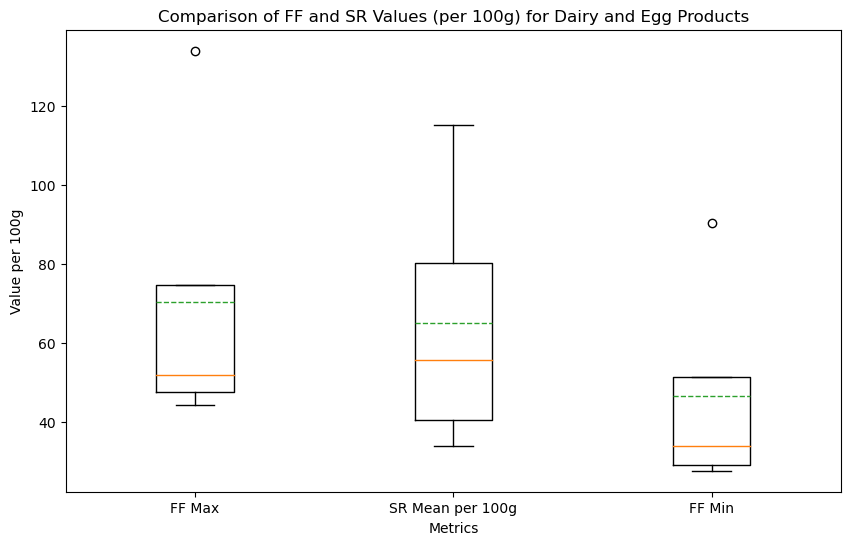

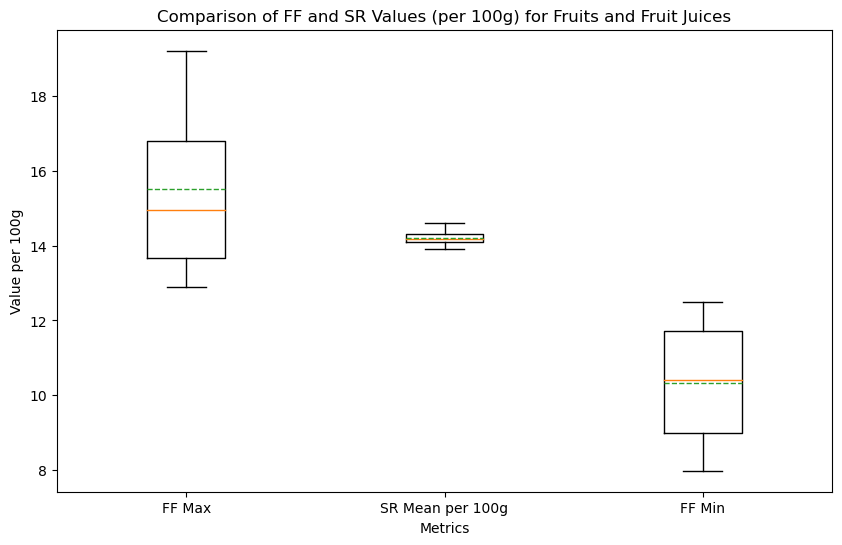

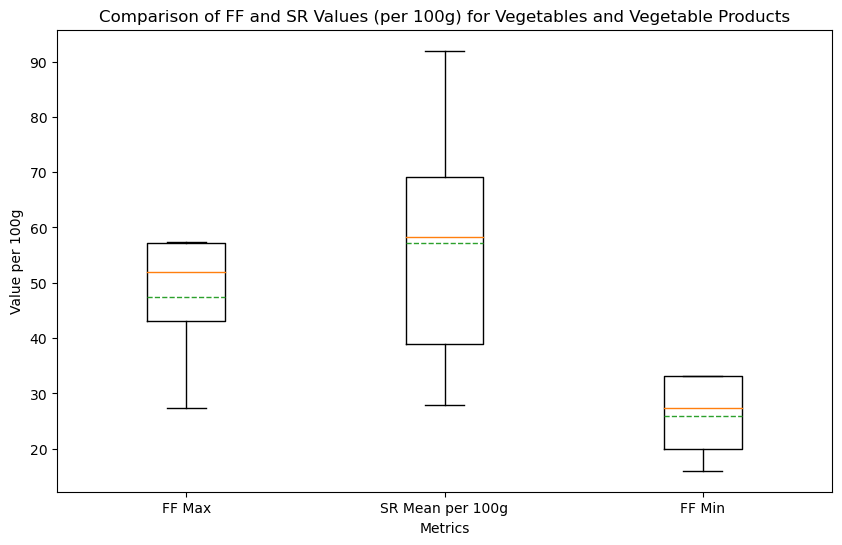

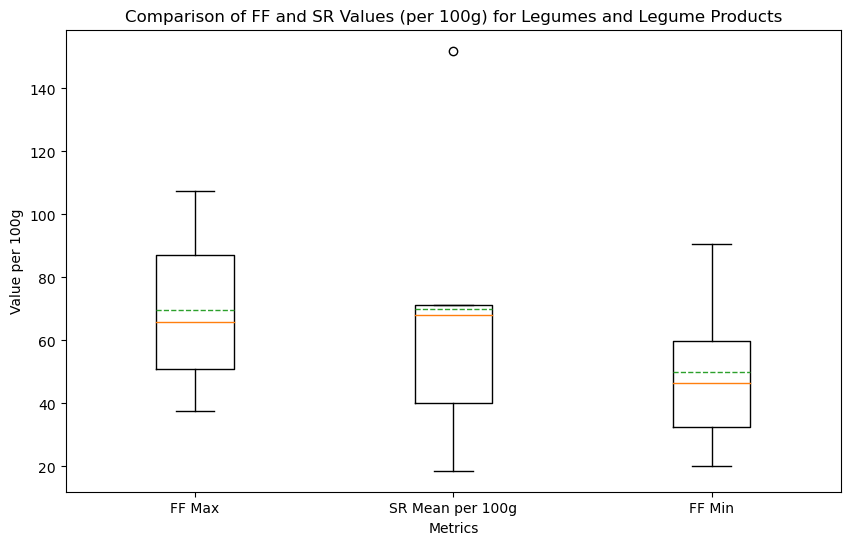

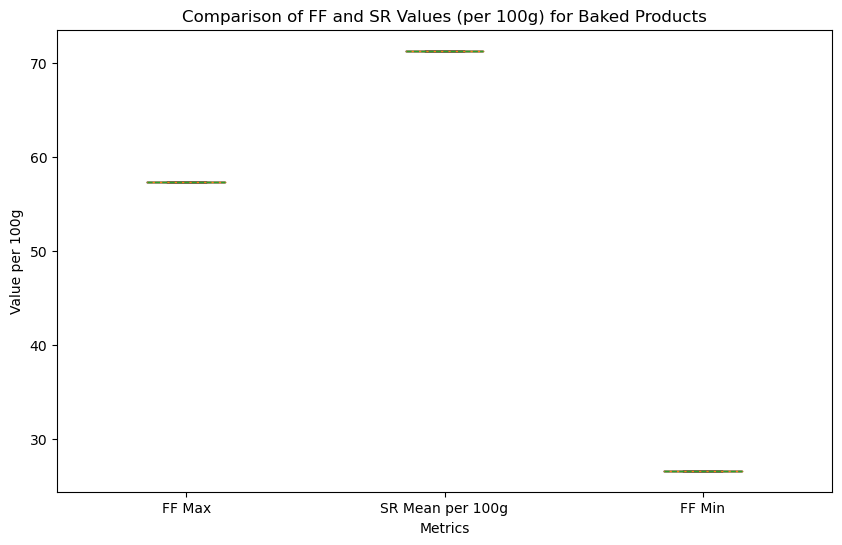

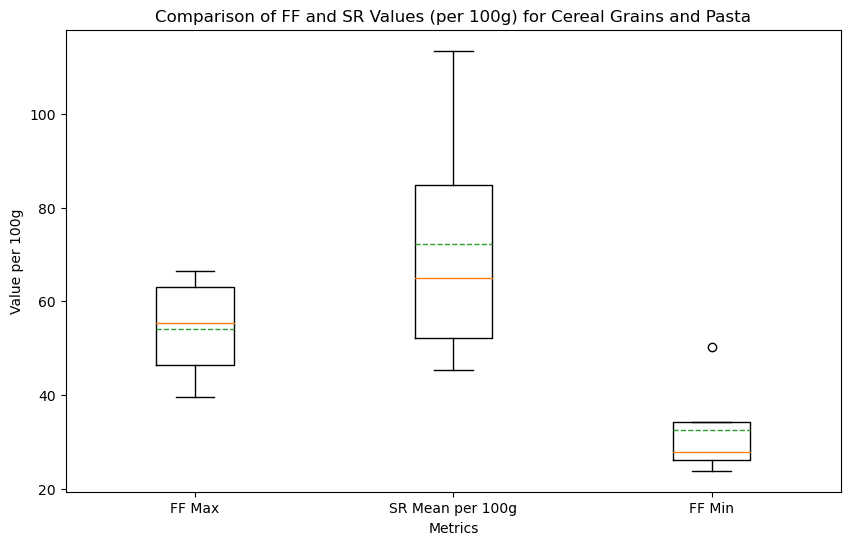

In [32]:
# Visualize changes over time
for category in focus_category:
    category_data = grouped_data[grouped_data['food_category_id'] == category]
    plt.figure(figsize=(10, 6))
    plt.boxplot([category_data['FF Max'], category_data['SR Mean per 100g'], category_data['FF Min']], labels=['FF Max', 'SR Mean per 100g', 'FF Min'], showmeans=True, meanline=True)
    name = food_categorydata.loc[food_categorydata['food_category_id']==category]['description'].iloc[0]
    # Add labels and title
    plt.xlabel('Metrics')
    plt.ylabel('Value per 100g')
    plt.title(f'Comparison of FF and SR Values (per 100g) for {name}')

# Show the plot
plt.show()


In [17]:
# Define the selected food categories with variance in values over time
selected_categories = [1,11,18,20]
#selected_nutrients = [1003,1079,1087,1090,1092,1114,1178,1247]
# Filter the grouped data for selected categories and nutrients
selected_data = work_data_imputed[work_data_imputed['food_category_id'].isin(selected_categories)]
#selected_data = selected_data[selected_data['Nutrient_id'].isin(selected_nutrients)]
# Calculate the mean of each nutrient within each category over time
variance_data = selected_data.groupby(['food_category_id','Nutrient_id']).agg({'FF Min':'mean','FF Max':'mean','FF Mean per 100g':'mean','SR Mean per 100g':'mean'}).reset_index()
variance_data['SR_in_range'] = variance_data['SR Mean per 100g'].between(variance_data['FF Min'], variance_data['FF Max'])
variance_data.head()

,food_category_id,Nutrient_id,FF Min,FF Max,FF Mean per 100g,SR Mean per 100g,SR_in_range
0,1,1003,13.892354,17.420497,15.759233,15.685143,True
1,1,1004,17.918649,21.362703,19.527878,19.710000,True
2,1,1005,41.816946,61.668701,4.350387,4.227429,False
3,1,1007,2.059286,3.002286,2.551194,2.479714,True
4,1,1008,41.816946,61.668701,223.857143,224.714286,False


In [18]:
falling_out = variance_data[variance_data['SR_in_range'] == False]
falling_out['Nutrient']
falling_out_result = falling_out['Nutrient_id'].value_counts().to_frame()
falling_out_result.reset_index(inplace=True)
falling_out_result.columns=['Nutrient_id','Frequency']
falling_out_result = falling_out_result.groupby(['Nutrient_id']).agg({'Frequency':'sum'}).reset_index()
falling_out_result.head()

,Nutrient_id,Frequency
0,1005,3
1,1008,4
2,1009,1
3,1013,1
4,1014,2


In [19]:
falling_out_result.sort_values('Frequency',ascending=False,inplace=True)
high_out_freq = falling_out_result[falling_out_result['Frequency']>=3]
high_out_freq.head()

,Nutrient_id,Frequency
6,1062,4
1,1008,4
0,1005,3
35,1292,3
31,1258,3


In [20]:
falling_in = variance_data[variance_data['SR_in_range'] == True]
falling_in_result = falling_in['Nutrient_id'].value_counts().to_frame()
falling_in_result.reset_index(inplace=True)
falling_in_result.columns=['Nutrient_id','Frequency']
falling_in_result = falling_in_result.groupby(['Nutrient_id']).agg({'Frequency':'sum'}).reset_index()
falling_in_result.head()

,Nutrient_id,Frequency
0,1003,4
1,1004,4
2,1005,1
3,1007,4
4,1009,3


In [21]:
falling_in_result.sort_values('Frequency',ascending=False,inplace=True)
high_in_freq = falling_in_result[falling_in_result['Frequency']>=3]
high_in_freq.head()

,Nutrient_id,Frequency
0,1003,4
13,1079,4
1,1004,4
23,1103,4
20,1095,4


In [22]:
nutrient_table.head()

,nutrient_id,name,unit_name,rank
0,2047,Energy (Atwater General Factors),KCAL,280.0
1,2048,Energy (Atwater Specific Factors),KCAL,290.0
2,1001,Solids,G,200.0
3,1002,Nitrogen,G,500.0
4,1003,Protein,G,600.0


In [23]:
merged_in_df = pd.merge(high_in_freq, nutrient_table, left_on='Nutrient_id', right_on='nutrient_id', how='inner')  # Use 'how' parameter to specify the type of merge
merged_in_df.head()

,Nutrient_id,Frequency,nutrient_id,name,unit_name,rank
0,1003,4,1003,Protein,G,600.0
1,1079,4,1079,"Fiber, total dietary",G,1200.0
2,1004,4,1004,Total lipid (fat),G,800.0
3,1103,4,1103,"Selenium, Se",UG,6200.0
4,1095,4,1095,"Zinc, Zn",MG,5900.0


In [35]:
merged_out_df = pd.merge(high_out_freq, nutrient_table, left_on='Nutrient_id', right_on='nutrient_id', how='inner')  # Use 'how' parameter to specify the type of merge
merged_out_df.head()

,Nutrient_id,Frequency,nutrient_id,name,unit_name,rank
0,1062,4,1062,Energy,kJ,400.0
1,1008,4,1008,Energy,KCAL,300.0
2,1005,3,1005,"Carbohydrate, by difference",G,1110.0
3,1292,3,1292,"Fatty acids, total monounsaturated",G,11400.0
4,1258,3,1258,"Fatty acids, total saturated",G,9700.0


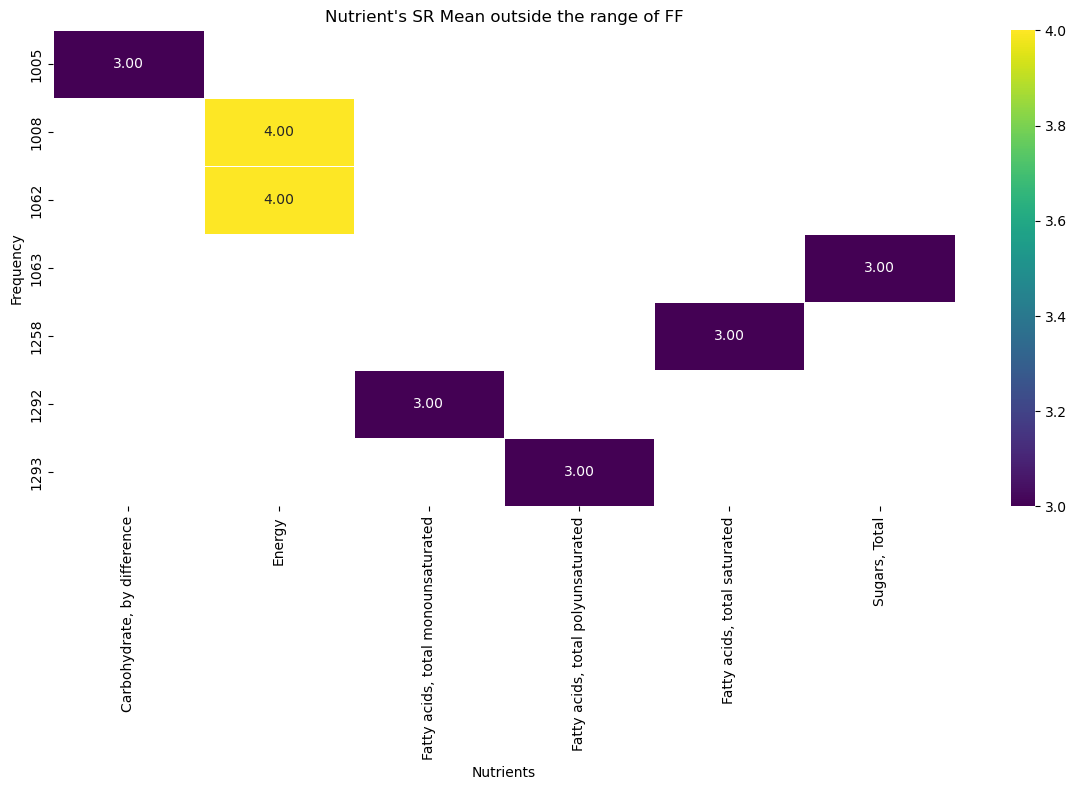

In [37]:
pivot_data = merged_out_df.pivot(index='Nutrient_id', columns='name',values='Frequency')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, cmap='viridis', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Nutrient\'s SR Mean outside the range of FF')
plt.xlabel('Nutrients')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

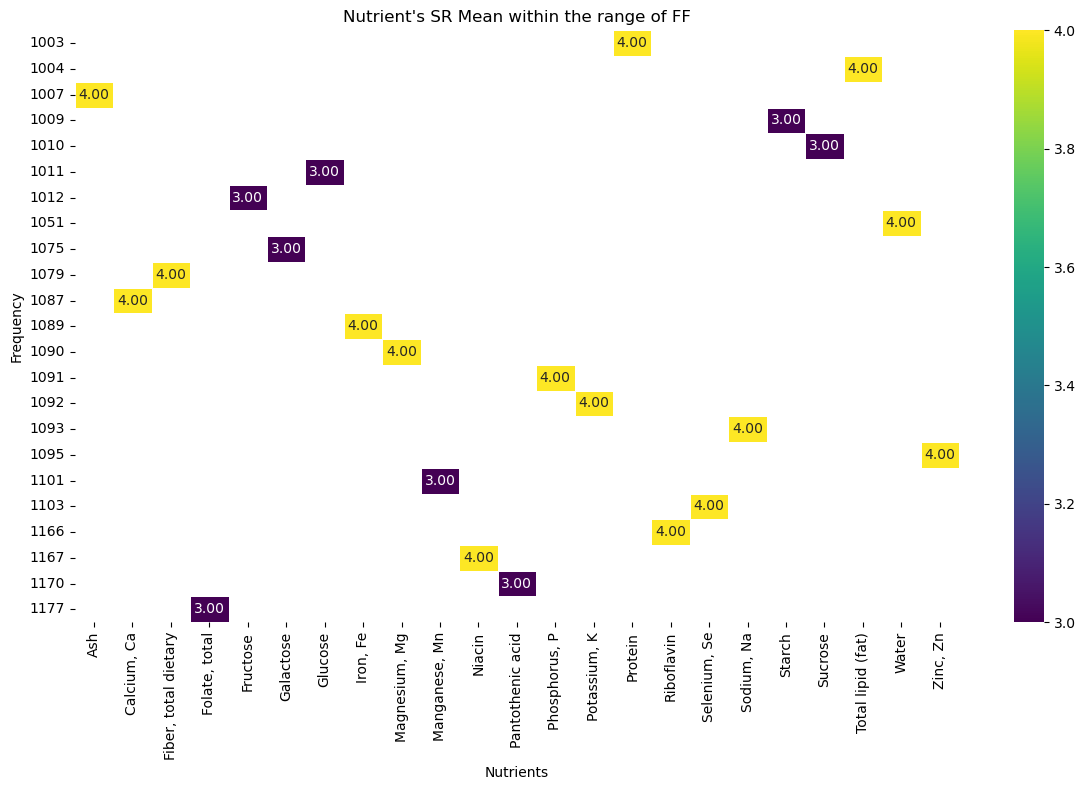

In [26]:
pivot_data = merged_in_df.pivot(index='Nutrient_id', columns='name',values='Frequency')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, cmap='viridis', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Nutrient\'s SR Mean within the range of FF')
plt.xlabel('Nutrients')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [27]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


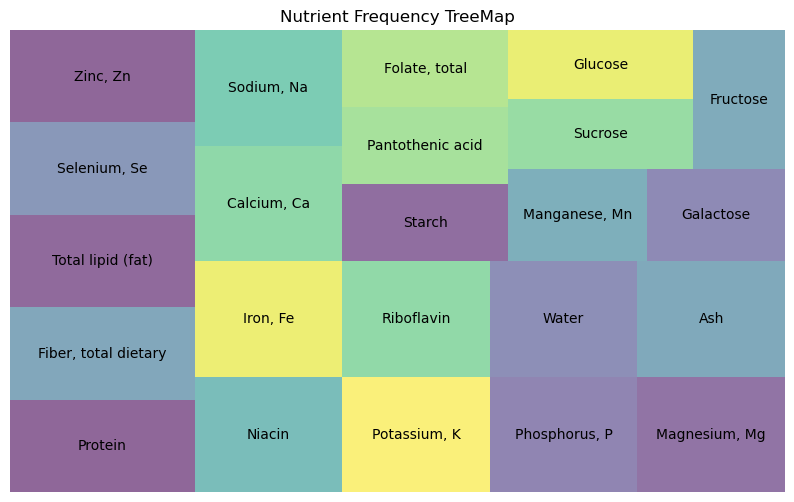

In [31]:
import squarify

# Sample data (replace with your actual data)
labels = ['Nutrient 1', 'Nutrient 2', 'Nutrient 3', 'Nutrient 4']
sizes = [20, 30, 15, 35]  # Frequencies or sizes of each nutrient

# Plotting the TreeMap
plt.figure(figsize=(10, 6))
squarify.plot(sizes=merged_in_df['Frequency'], label=merged_in_df['name'], alpha=0.6)
plt.axis('off')  # Turn off axis
plt.title('Nutrient Frequency TreeMap')
plt.show()